In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import ast
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# nltk.download_shell()


## reading dataset

In [3]:
movie = pd.read_csv('datasets/tmdb_5000_movies.csv')
credits = pd.read_csv('datasets/tmdb_5000_credits.csv')

In [4]:
"""

    movie dataset
    
    budget : budget of movie
    genres : information of actors
    homepage : movie home page link
    id : unique id of movie
    keywords : keywords related to movie
    origional_language : origional language of movie
    overview : short description of movie
    popularity : popularity score of movies
    production_companies : names of producer companies
    production_countries : names of countries in which movie is produced
    release_date : Release date of movie
    revenue : Income genrated by movie
    runtime : movie duration
    spoken_languages : languages spoken in movie
    status : Current status of movie
    tagline : movie tagline
    title : title of movie in English
    vote_average : average score of movie
    
"""
movie.head(3)
# movie.dtypes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
# 
#     movie_id : unique id of movie
#     title : title of movie in English
#     cast : role of actors
#         crew : other roles
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Merging two datasets

In [6]:
movie = movie.merge(credits,how='inner',on='title')

In [7]:
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


[Text(0.5, 0, 'language count'), Text(0, 0.5, 'language')]

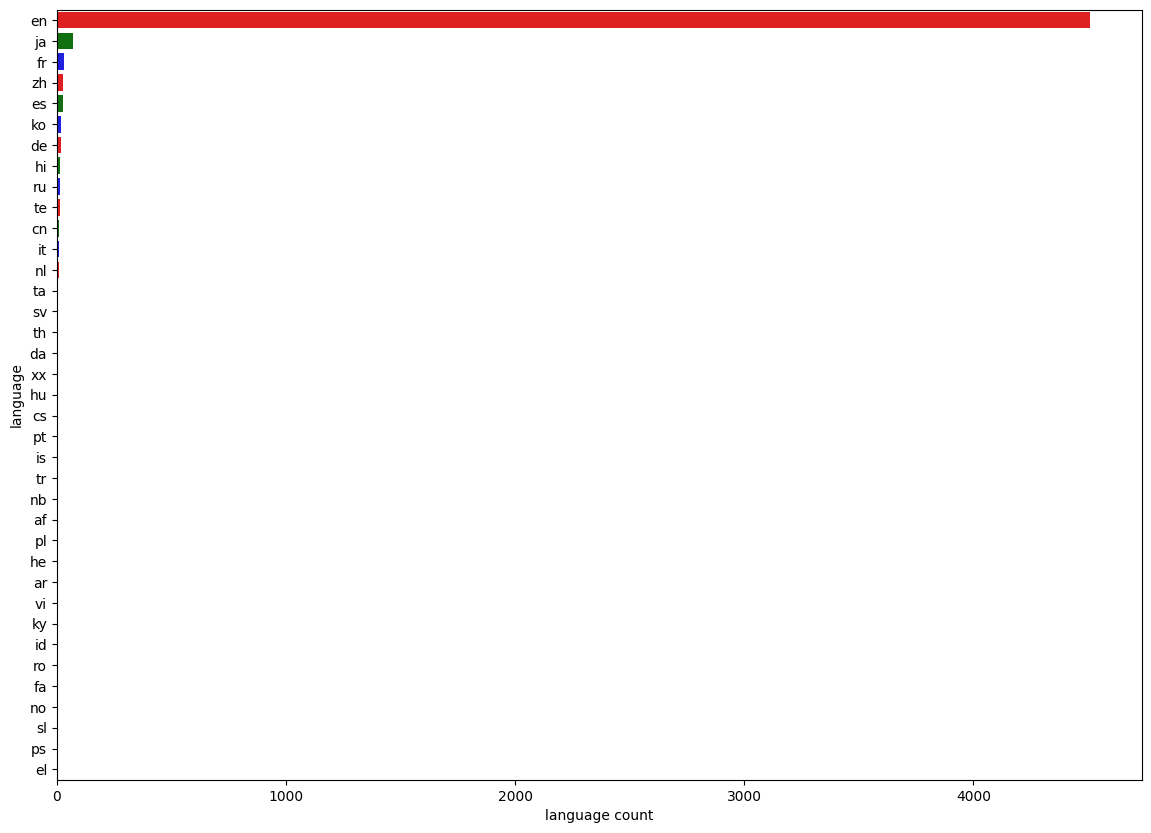

In [8]:
plt.figure(figsize=(14,10))
lan_bar = sns.barplot(y = movie['original_language'].unique(),x=movie['original_language'].value_counts(),palette=['red','green','blue'])
lan_bar.set(xlabel='language count',ylabel='language')

In [10]:
# px.bar(y = movie['original_language'].unique(),x=movie['original_language'].value_counts(),title='language count')

## selecting best features

In [11]:
#budget does not imapct 
#genres is import (Romantic , Adventures ect)
#as we can see almorst 90% movies in english hence we will not using this column.
#we will keep title (english)
#overview is important so we will keep this.
#and cast and crew also included
features = ['movie_id','genres','keywords','title','cast','crew','overview']


In [12]:
#new dataframe after including necessary features
movies = movie[features]

In [13]:
movies.head(2)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Captain Barbossa, long believed to be dead, ha..."


## Missing data

In [14]:
#check for missing values
movies.isnull().sum()

movie_id    0
genres      0
keywords    0
title       0
cast        0
crew        0
overview    3
dtype: int64

In [15]:
movies.dropna(inplace=True)

In [16]:
movies.isnull().sum()

movie_id    0
genres      0
keywords    0
title       0
cast        0
crew        0
overview    0
dtype: int64

In [17]:
#check for duplicates
movies.duplicated().sum()

0

In [18]:
movies.head(1)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","In the 22nd century, a paraplegic Marine is di..."


In [19]:
def string_to_list(df):
    df = df.apply(ast.literal_eval)
    return df

In [20]:
movies['cast'] = string_to_list(movies['cast'])

In [21]:
type(movies['cast'][0])

list

In [22]:
movies['genres'] = string_to_list(movies['genres'])

In [23]:
type(movies['genres'][0])

list

In [24]:
movies['crew'] = string_to_list(movies['crew'])

In [25]:
type(movies['crew'][0])

list

In [26]:
movies['keywords'] = string_to_list(movies['keywords'])

In [27]:
type(movies['keywords'][0])

list

In [28]:
movies.head(1)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","In the 22nd century, a paraplegic Marine is di..."


In [29]:
def get_genres(df):
    name_list = []
    j = 0
    for i in df:
        name_list.append(i['name'])
        if j==5:
            break
        j = j+1
    return name_list

In [30]:
movies['genres'] = movies['genres'].apply(get_genres)

In [31]:
movies['keywords'] = movies['keywords'].apply(get_genres)

In [32]:
movies.head(2)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","Captain Barbossa, long believed to be dead, ha..."


In [33]:
movies['cast'] = movies['cast'].apply(get_genres)

In [34]:
movies.head(2)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","Captain Barbossa, long believed to be dead, ha..."


In [35]:
def get_director_name(df):
    name_list = []
    j = 0
    for i in df:
        if i['job']=='Director':
            name_list.append(i['name'])
            break
    return name_list

In [36]:
movies['crew'] = movies['crew'].apply(get_director_name)

In [37]:
movies.head(5)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],A cryptic message from Bond’s past sends him o...
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],Following the death of District Attorney Harve...
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],"John Carter is a war-weary, former military ca..."


In [38]:
movies['overview'] = movies['overview'].apply(lambda x : x.split())

In [39]:
movies.head(3)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[A, cryptic, message, from, Bond’s, past, send..."


In [40]:
a = movies['keywords'][0]

In [41]:
for i in a:
    print(i.replace(' ',''))

cultureclash
future
spacewar
spacecolony
society
spacetravel


In [42]:
movies['genres'] = movies['genres'].apply(lambda x : [i.replace(' ','') for i in x])

In [43]:
movies['keywords'] = movies['keywords'].apply(lambda x : [i.replace(' ','') for i in x])

In [44]:
movies['cast'] = movies['cast'].apply(lambda x : [i.replace(' ','') for i in x])

In [45]:
movies['crew'] = movies['crew'].apply(lambda x : [i.replace(' ','') for i in x])

In [46]:
movies.head(1)

,movie_id,genres,keywords,title,cast,crew,overview
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [71]:
movies['movie_id'][0]
movies.head()

,movie_id,title,movie_tags
0,19995,avatar,cultureclash futur spacewar spacecoloni societ...
1,285,pirates of the caribbean: at world's end,ocean drugabus exoticisland eastindiatradingco...
2,206647,spectre,spi basedonnovel secretag sequel mi6 britishse...
3,49026,the dark knight rises,dccomic crimefight terrorist secretident burgl...
4,49529,john carter,basedonnovel mar medallion spacetravel princes...


In [49]:
import pickle
with open('models/view_data.pkl','wb') as s:
    pickle.dump(movies,s)
    

In [50]:
#join all columns exepect movie_id and title and make one columns
movies['movie_tags'] = movies['keywords'] + movies['cast']+movies['crew']+movies['overview']

In [51]:
movies.head(2)

,movie_id,genres,keywords,title,cast,crew,overview,movie_tags
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad..."


In [52]:
movies = movies.drop(['genres','keywords','cast','crew','overview'],axis=1)

In [53]:
#the final datafrmae will look like this
movies.head()

,movie_id,title,movie_tags
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[basedonnovel, mars, medallion, spacetravel, p..."


In [54]:
#convert list to string for movie_tags column
movies['movie_tags'] = movies['movie_tags'].apply(lambda x : ' '.join(x))

In [55]:
movies.head()

,movie_id,title,movie_tags
0,19995,Avatar,cultureclash future spacewar spacecolony socie...
1,285,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland eastindiatradingc...
2,206647,Spectre,spy basedonnovel secretagent sequel mi6 britis...
3,49026,The Dark Knight Rises,dccomics crimefighter terrorist secretidentity...
4,49529,John Carter,basedonnovel mars medallion spacetravel prince...


In [56]:
movies['movie_tags'] = movies['movie_tags'].apply(lambda x : x.lower())
movies['title'] = movies['title'].apply(lambda x : x.lower())

In [57]:
movies.head()

,movie_id,title,movie_tags
0,19995,avatar,cultureclash future spacewar spacecolony socie...
1,285,pirates of the caribbean: at world's end,ocean drugabuse exoticisland eastindiatradingc...
2,206647,spectre,spy basedonnovel secretagent sequel mi6 britis...
3,49026,the dark knight rises,dccomics crimefighter terrorist secretidentity...
4,49529,john carter,basedonnovel mars medallion spacetravel prince...


## NLP

In [58]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
movies['movie_tags'] = movies['movie_tags'].apply(lambda x : [st.stem(i) for i in x.split()])

In [59]:
cv = CountVectorizer(
    max_features=5000,    
    stop_words='english',
)

In [60]:

movies['movie_tags'] = movies['movie_tags'].apply(lambda x : ' '.join(x))

In [61]:
movies.head(2)

,movie_id,title,movie_tags
0,19995,avatar,cultureclash futur spacewar spacecoloni societ...
1,285,pirates of the caribbean: at world's end,ocean drugabus exoticisland eastindiatradingco...


In [62]:
vectors = cv.fit_transform(movies['movie_tags']).toarray()

In [63]:
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '1910',
 '1920',
 '1930',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1980',
 '1985',
 '1990',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2009',
 '20th',
 '21st',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 'aaron',
 'aaroneckhart',
 'aarontaylor',
 'abandon',
 'abbiecornish',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adambrodi',
 'adamgoldberg',
 'adamsandl',
 'adamscott',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult',
 'adulteri',
 'adul

In [64]:
#to find how one movie is related to other we will find cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
similar = cosine_similarity(vectors)

In [66]:
for i in similar[0]:
    print(i)

1.0000000000000002
0.0
0.0
0.07777137710478191
0.09682458365518543
0.029774566708770687
0.027777777777777783
0.032686022523030676
0.0
0.0
0.0
0.03187883565316692
0.0
0.0
0.03355780276070122
0.0
0.0
0.0
0.048795003647426664
0.0
0.018330889377669166
0.0
0.0
0.0
0.0
0.022541740866685808
0.03500700210070025
0.08111071056538129
0.0
0.028306925853614898
0.0
0.044543540318737404
0.0
0.0
0.0
0.0
0.09563650695950075
0.0
0.025717224993681984
0.0
0.03500700210070025
0.06225728063646904
0.0
0.09563650695950075
0.04166666666666668
0.054073807043587524
0.0
0.07715167498104596
0.0265747001726367
0.0
0.0
0.0
0.034020690871988585
0.0
0.0
0.0
0.0468292905790847
0.0
0.029462782549439487
0.023728949893812478
0.024225079155575462
0.0468292905790847
0.0
0.0
0.0
0.0
0.0
0.03500700210070025
0.042562826537937436
0.0
0.0
0.0
0.037904902178945175
0.0
0.08838834764831846
0.03450327796711771
0.0
0.0
0.0
0.0
0.021516574145596764
0.0
0.0
0.030772872744833188
0.0
0.04233337566673017
0.0
0.036084391824351615
0.0
0.018

In [67]:
#create a function to recommend movie

def recommend_movie(movie_name : str) -> None:
    #calculate the movie index 
    try:
        movie_index = movies[movies['title']==movie_name.lower()].index[0]
        movie_distance = similar[movie_index]
        #we don't want to loose indexes hence use enumerate
        sorted_distance = sorted(list(enumerate(movie_distance)),reverse=True,key=lambda x : x[1])
        for i in sorted_distance[1:6]:
            print(movies.iloc[i[0]]['title'])
    except IndexError:
        print("movie name not found in database")

In [68]:
recommend_movie('avengers')
# movies[movies['title'] == 'avatar'].index[0]

movie name not found in database


In [69]:
movies.iloc[2421]['title']

'a night at the roxbury'

In [70]:
import pickle
with open('models/model.pkl','wb') as m:
    pickle.dump(movies,m)
with open('models/similar.pkl','wb') as s:
    pickle.dump(similar,s)
    